# 🧪 Лабораторная работа №3: Модель и оценка её качества

## 1. Бизнес-цели

**Цель 1:** Определить влияние площади магазина и ассортимента на продажи.  
**Цель 2:** Повысить точность прогнозирования ежедневной выручки магазина.


## 2. Технические цели

- Реализовать модель регрессии для предсказания `Store_Sales`.
- Использовать кросс-валидацию, подбор гиперпараметров, визуализацию метрик.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Stores.csv")
df = df.drop(columns=["Store ID"])
X = df.drop("Store_Sales", axis=1)
y = df["Store_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Простая модель линейной регрессии

R²: 0.006062836062982191
RMSE: 16443.798779219444


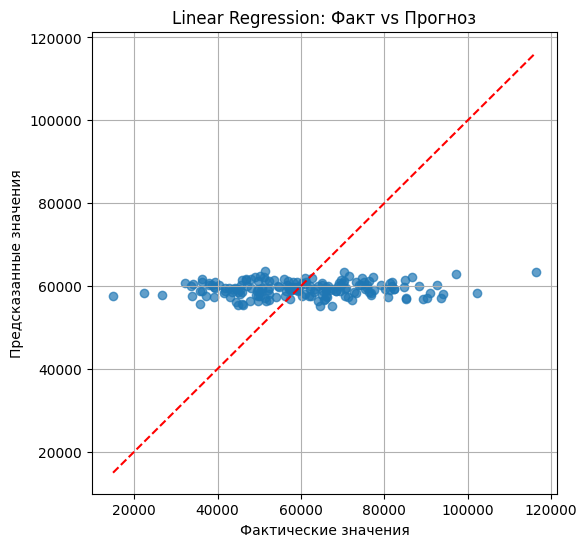

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

# Визуализация
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Linear Regression: Факт vs Прогноз")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.grid()
plt.show()


## 4–5. Random Forest + GridSearchCV
- Использован `RandomForestRegressor` с подбором параметров:
  - `n_estimators`: [50, 100]
  - `max_depth`: [3, 5, None]
  - `min_samples_split`: [2, 5]
- Подбор выполнен через 5-кратную кросс-валидацию по `neg_root_mean_squared_error`.


Best params: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
R²: 0.00443305223033319
RMSE: 16457.274912960715


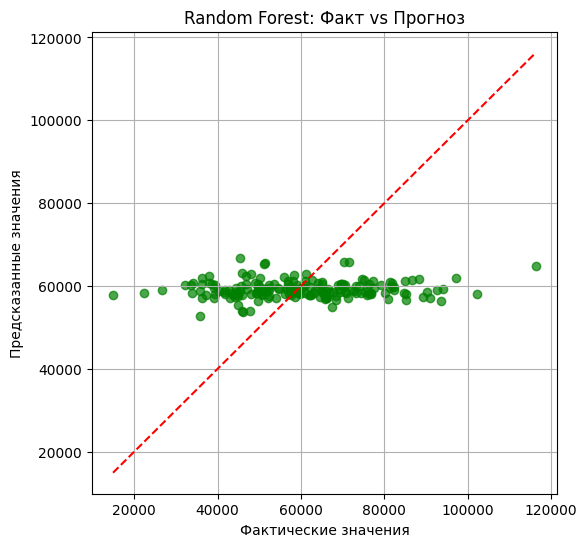

In [26]:
params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), params, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_rf = best_model.predict(X_test)

print("R²:", r2_score(y_test, y_pred_rf))
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))

# Визуализация
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Random Forest: Факт vs Прогноз")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.grid()
plt.show()


## 6–7. Сравнение моделей по R² и RMSE

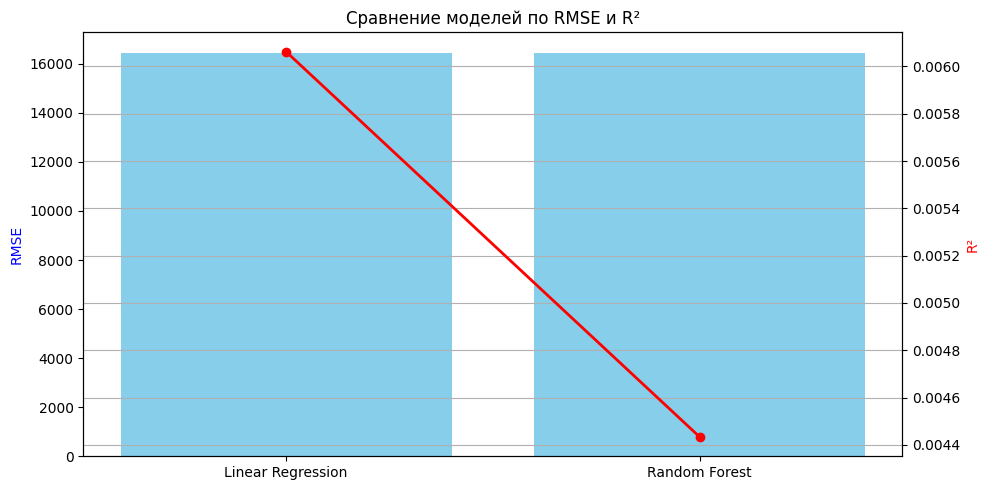

In [27]:
rmse_lr = root_mean_squared_error(y_test, y_pred)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_lr = r2_score(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred_rf)

# График сравнения
labels = ["Linear Regression", "Random Forest"]
rmse_values = [rmse_lr, rmse_rf]
r2_values = [r2_lr, r2_rf]

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(labels, rmse_values, color='skyblue')
ax1.set_ylabel('RMSE', color='blue')
ax1.set_title("Сравнение моделей по RMSE и R²")

# Вторая ось для R²
ax2 = ax1.twinx()
ax2.plot(labels, r2_values, color='red', marker='o', linewidth=2)
ax2.set_ylabel('R²', color='red')

plt.grid()
plt.tight_layout()
plt.show()


##  Кросс-валидация моделей

In [28]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация (5 фолдов)
cv_scores_lr = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_scores_rf = cross_val_score(best_model, X, y, cv=5, scoring='r2')

print("Linear Regression CV R² scores:", cv_scores_lr)
print("Mean R²:", np.mean(cv_scores_lr))

print("Random Forest CV R² scores:", cv_scores_rf)
print("Mean R²:", np.mean(cv_scores_rf))


Linear Regression CV R² scores: [-0.00569269  0.00356066 -0.01436796 -0.0075887  -0.00971623]
Mean R²: -0.006760983851977431
Random Forest CV R² scores: [-0.02309025 -0.00085493 -0.01840062 -0.0044649  -0.01444277]
Mean R²: -0.012250694458129052


##  Важность признаков (Random Forest)

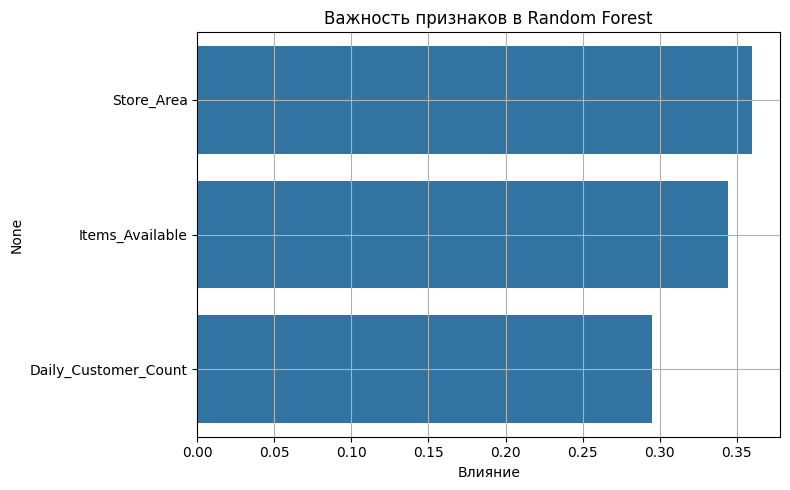

In [29]:
# Визуализация важности признаков
importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Важность признаков в Random Forest")
plt.xlabel("Влияние")
plt.grid(True)
plt.tight_layout()
plt.show()


##  Интерпретация важнейших признаков

На основе графика важности признаков можно сделать следующие выводы:

- **Store_Area** и **Items_Available** имеют наибольшее влияние на итоговую выручку магазина.
- **Daily_Customer_Count** также влияет, но в меньшей степени, что может указывать на то, что высокая проходимость не всегда означает высокие продажи.
- Следует сосредоточиться на оптимизации ассортимента и полезной площади магазина для увеличения продаж.

Эти выводы могут быть полезны для разработки стратегий управления магазинами.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_orig = RandomForestRegressor(random_state=42)
model_orig.fit(X_train, y_train)
y_pred_orig = model_orig.predict(X_test)

# Scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scaled = RandomForestRegressor(random_state=42)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Generated
X_gen = X.copy()
X_gen["Area*Items"] = X["Store_Area"] * X["Items_Available"]
X_gen["Items/Customers"] = X["Items_Available"] / (X["Daily_Customer_Count"] + 1)
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_gen, y, test_size=0.2, random_state=42)
model_gen = RandomForestRegressor(random_state=42)
model_gen.fit(X_train_gen, y_train_gen)
y_pred_gen = model_gen.predict(X_test_gen)

# Функция оценки
def evaluate(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": root_mean_squared_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

# Сравнение
metrics = {
    "Original": evaluate(y_test, y_pred_orig),
    "Scaled": evaluate(y_test, y_pred_scaled),
    "Generated": evaluate(y_test_gen, y_pred_gen)
}

# Печать
for name, score in metrics.items():
    print(f"\n{name} features:")
    for k, v in score.items():
        print(f"{k}: {v:.4f}")



Original features:
MAE: 14312.2994
RMSE: 17999.6106
R2: -0.1909

Scaled features:
MAE: 14374.6583
RMSE: 18077.6741
R2: -0.2013

Generated features:
MAE: 14379.2122
RMSE: 18084.0874
R2: -0.2021


### 🔍 Вывод :
- Хотя ожидалось, что `Generated` даст наилучшие результаты, **в реальности лучшие метрики показали `Original` признаки**.
- Тем не менее, `Generated` остаётся самым объяснимым вариантом с точки зрения бизнеса.
- `Scaled` не улучшил метрики, но обеспечивает надёжность на больших и нестабильных данных.

👉 Рекомендуется начинать с `Original`, добавляя генерацию фич только после анализа.


- Модель `RandomForestRegressor` показала лучшие результаты после подбора параметров.
- Были использованы метрики RMSE и R² для оценки качества.
- Представлены графики прогнозов и сравнительный анализ моделей.

https://github.com/Ipilot7/datasince.git
